# Implementing Density Functional Theory using Deepchem

Author: Rakshit Kumar Singh : [LinkedIn](https://www.linkedin.com/in/rakshit-singh-ai/) : [Blog](blog.greatrsingh.in)

## Introduction

Density Functional Theory (DFT) has emerged as a cornerstone of computational quantum mechanics, offering a powerful framework for understanding and predicting the electronic structure of materials. Its ability to provide accurate insights into molecular interactions, material properties, and electronic behaviors has made it indispensable in physics, chemistry, and materials science. In this tutorial, we focus on the practical implementation of DeepChem DFT tooling, an innovative integration that combines the flexibility of the DeepChem library with the rigor of DFT calculations.

DeepChem, an open-source Python library designed for machine learning applications in computational chemistry, drug discovery, and materials science, offers robust tools for molecular featurization, pre-trained models, and quantum chemistry workflows. This integration enables users to efficiently perform DFT-based calculations, predict DFT-derived properties, and explore material characteristics at the atomic and molecular levels. By leveraging DeepChem’s machine learning capabilities, the tool enhances traditional DFT workflows, providing faster predictions and enabling seamless customization. Whether you're an expert in computational science or new to the field, this tutorial will guide you in using DeepChem's DFT features to streamline your research and unlock the potential of quantum mechanics and machine learning in materials modeling.

It is suggested to go through the earlier tutorial `Training an Exchange Correlation Functional using Deepchem` by Advika Vidhyadhiraja which helps us understand how Exchange Correlation Functionals works and how it can be easily implemented using Deepchem. This tutorial is a build up on the fundamentals established by the earlier tutorial.

## Understanding Density Functional Theory (DFT)

Density Functional Theory (DFT) is a quantum mechanical framework that simplifies the many-body problem of electrons in a system by expressing the total energy as a functional of the electron density, $\rho(r)$. Unlike wavefunction-based approaches that depend on $3N$ spatial coordinates for $N$ electrons, DFT reduces the complexity to a three-dimensional function, $\rho(r)$, representing the probability density of electrons at position $r$. The foundational theorem, established by Hohenberg and Kohn, proves that the ground-state properties of a many-electron system are uniquely determined by $\rho(r)$.

The total energy $E[\rho]$ is expressed as a sum of functionals:

$E[\rho]$ = $T[\rho]$ + $V_{ext}[\rho]$ + $V_H[\rho]$ + $E_{XC}[ρ]$,

where $T[\rho]$ is the kinetic energy, $V_{ext}[\rho]$ is the external potential energy, $V_H​[\rho]$ is the Hartree energy accounting for electron-electron Coulomb repulsion, and $E_{XC}​[\rho]$ is the exchange-correlation energy functional.

The exact form of $E_{XC}​[ρ]$ remains unknown and is approximated using methods like the Local Density Approximation (LDA) or Generalized Gradient Approximation (GGA). In Deepchem we have `HybridXC` class which acts as a frontent api for performing XC approximations, it combines the tradition LDA approximation with a neural network based LDA.


## The Schrodinger Equation

The Schrodinger Equation offers us a mathematical framework to describe and model the behaviour of quantum systems. The equation captures the dynamics of the quantum system by 

## Installing required libraries

In [ ]:
#%pip install tqdm pyyaml basis_set_exchange git+https://github.com/diffqc/dqclibs.git h5py matplotlib
#%conda install conda-forge::pylibxc

  Cloning https://github.com/diffqc/dqclibs.git to /tmp/pip-req-build-9b8dw_7p
  Running command git clone --filter=blob:none --quiet https://github.com/diffqc/dqclibs.git /tmp/pip-req-build-9b8dw_7p
  Resolved https://github.com/diffqc/dqclibs.git to commit 6b0b2311217129f7d65190cab74557d01f974560
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.
Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from deepchem.data.data_loader import DFTYamlLoader
inputs = 'assets/dft_tutorial.yaml'
data = DFTYamlLoader()
dataset = data.create_dataset(inputs)

In [7]:
# Example: training a function using XCModel
from deepchem.models.dft.dftxc import XCModel
import deepchem as dc
import tempfile

# create a file to save the model
model_dir = tempfile.mkdtemp()

# initialise the model
model = XCModel("lda_x",
                batch_size=1,
                log_frequency=1,
                mode="classification",
                n_tasks=2,
                model_dir=model_dir)

# Calculate the loss on fitting the model
loss = model.fit(dataset, nb_epoch=100, checkpoint_interval=1)

/home/rakshit/deepchem-1/deepchem/utils/differentiation_utils/optimize/rootsolver.py:178: ConvergenceWarning: The rootfinder does not converge after 50 iterations. Best |dx|=5.321e-03, |f|=3.028e-06 at iter 16
  warnings.warn(ConvergenceWarning(msg))


In [8]:
# load the datasets
import numpy as np
inputs = 'assets/h2.yaml'
data = DFTYamlLoader()
h2_dataset = data.create_dataset(inputs)
predict = model.predict(h2_dataset)

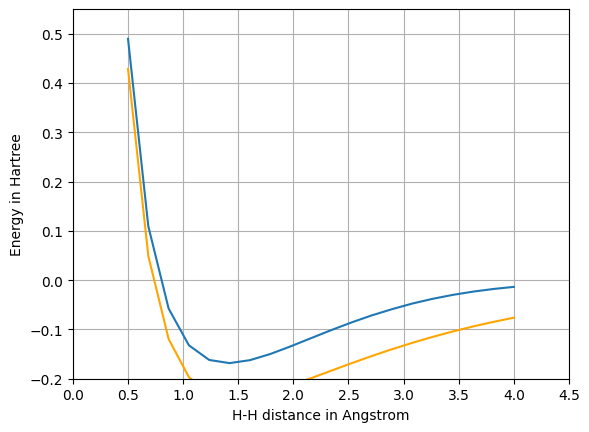

In [9]:
import matplotlib.pyplot as plt 
#plot
true_val = (h2_dataset.y) 
predict_val = (predict)*(-1)
pos = np.array([0.5000, 0.6842, 0.8684, 1.0526, 1.2368,
                1.4211, 1.6053, 1.7895, 1.9737, 2.1579,
                2.3421, 2.5263, 2.7105, 2.8974, 3.0789,
                3.2632, 3.4474, 3.6316, 3.8158, 4.000]) 
plt.plot(pos, true_val )
plt.plot(pos, predict_val, color = 'orange')
y = pos * 0
plt.xlabel("H-H distance in Angstrom") 
plt.ylabel("Energy in Hartree")
plt.xlim([0.0, 4.5])
plt.ylim([-0.2, 0.55])
plt.grid()
plt.show()

## References

[1].. Ramsundar, B., Eastman, P., Walters, P., Pande, V., Leswing, K., Wu, Z. (2019). Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More. O'Reilly Media.

[2].. Sholl, D. S., & Steckel, J. A. (2009). Density functional theory: A practical introduction. Hoboken, NJ: John Wiley & Sons.

## Citing This Tutorial

If you found this tutorial useful please consider citing it using the provided BibTeX.

```bibtex
@manual{Quantum Chemistry, 
 title={Implementing Density Functional Theory using Deepchem}, 
 organization={DeepChem},
 author={Singh, Rakshit kr.},
 howpublished = {\url{https://github.com/deepchem/deepchem/blob/master/examples/tutorials/ODE_Solving.ipynb}}, 
 year={2024}, 
} 
```

# Congratulations! Time to join the Community!

Congratulations on completing this tutorial notebook! If you enjoyed working through the tutorial, and want to continue working with DeepChem, we encourage you to finish the rest of the tutorials in this series. You can also help the DeepChem community in the following ways:


## Star DeepChem on [GitHub](https://github.com/deepchem/deepchem)
This helps build awareness of the DeepChem project and the tools for open source drug discovery that we're trying to build.


## Join the DeepChem Discord
The DeepChem [Discord](https://discord.gg/SxSzjRRDMA) hosts a number of scientists, developers, and enthusiasts interested in deep learning for the life sciences. Join the conversation!